# Implement Kmeans from scratch
#### Author: Miguel Martinez

In [111]:
import numpy as np
import pandas as pd

# to scale
from sklearn import preprocessing

# to bring in current working directory dynamically
import os


In [112]:
def kmeans(df, n_clusters=5, n_init=50):
    print("do nothing")

In [113]:
# read in the data
cwd = os.getcwd()
iris_df = pd.read_csv(cwd + "/iris.csv")

In [114]:
iris_df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [115]:
features = ['sepal_length', 'sepal_width', 'petal_width', 'petal_width']
feature_cols = ['sepal_length','petal_width']
X = iris_df[feature_cols]

In [116]:
# set vars for kmeans
n_clusters = 3
n_init = 50

# scale with zero means and unit standard deviation
X = pd.DataFrame(preprocessing.scale(X), index = X.index, columns = X.columns)

numFeatures = X.shape[1]
numSamples = X.shape[0]

In [117]:
X.head()

,sepal_length,petal_width
0,-0.900681,-1.312977
1,-1.143017,-1.312977
2,-1.385353,-1.312977
3,-1.506521,-1.312977
4,-1.021849,-1.312977


In [118]:
# step 0 - initialization
globalInitLowestCost = 0.0
globalInitLowestInitilizations = [0] * numFeatures
centroids = np.zeros([numFeatures, n_clusters])

# iterate through the number of initializations
for i in range(0, n_init):
    
    # generate random centroids
    centroids = np.random.rand(numFeatures, n_clusters)
    centroidCosts = 0.0
        
    # create empty assignments numpy array
    assignments = np.empty(numSamples)

    for currSample in range(0, numSamples):
        lowestCost = 0.0
        bestCentroid = 0

        # iterate through each centroid
        for currCentroid in range(0, n_clusters):
            centroidCosts = 0.0
            sampleSum = 0.0
            
            #iterate through each feature
            for currFeature in range(0,numFeatures):
                diff = X.iloc[currSample, currFeature] - centroids[currFeature, currCentroid]
                sampleSum += diff * diff

            centroidCosts += sampleSum

            if currCentroid == 0:
                lowestCost = centroidCosts
                bestCentroid = currCentroid
            else:
                if centroidCosts < lowestCost:
                    lowestCost = centroidCosts
                    bestCentroid = currCentroid

        # assign best centroid
        assignments[currSample] = bestCentroid

    
    centroidCosts = np.zeros([1, n_clusters])
    
    #compute cost for each centroid
    for currCentroid in range(0, n_clusters):
        for currSample in range(0, numSamples): 
            if(currCentroid == assignments[currSample]):
                for currFeature in range(0, numFeatures):
                    diff = X.iloc[currSample, currFeature] - centroids[currFeature, currCentroid]
                    centroidCosts[0,currCentroid] += diff * diff
                    
    
    #sum up costs for all centroids in this initialization
    initTotalCost = centroidCosts.sum() / numSamples
    
              
    if i == 0:
        globalInitLowestCost = initTotalCost
        globalInitLowestInitilizations = centroids
        #print("first run")
        print("first run with cost=", globalInitLowestCost)
    else:
        if initTotalCost < globalInitLowestCost:
            globalInitLowestCost = initTotalCost
            globalInitLowestInitilizations = centroids
            print("better run on:", i, "with cost=", globalInitLowestCost)
        
        
print("best cost is", globalInitLowestCost, "with centroids:")
print(globalInitLowestInitilizations)


# M = samples
# D = number of features
# k = output clusters
print("complete")

first run with cost= 1.71788457886
better run on: 1 with cost= 1.58506447921
better run on: 10 with cost= 1.54930999029
better run on: 32 with cost= 1.482747484
better run on: 40 with cost= 1.34579790833
best cost is 1.34579790833 with centroids:
[[ 0.11669255  0.73662438  0.05043678]
 [ 0.53038291  0.85142041  0.06206759]]
complete


In [119]:
centroidsMoved = True

while centroidsMoved:
    # step 1, cluster assignment 

    # create empty assignments numpy array
    assignments = np.empty(numSamples)

    for currSample in range(0, numSamples):
        lowestCost = 0.0
        bestCentroid = 0

        # iterate through each centroid
        for currCentroid in range(0, n_clusters):
            centroidCosts = 0.0
            sampleSum = 0.0
            #iterate through each feature
            for currFeature in range(0,numFeatures):
                diff = X.iloc[currSample, currFeature] - centroids[currFeature, currCentroid]
                sampleSum += diff * diff

            centroidCosts += sampleSum

            if currCentroid == 0:
                lowestCost = centroidCosts
                bestCentroid = currCentroid
            else:
                if centroidCosts < lowestCost:
                    lowestCost = centroidCosts
                    bestCentroid = currCentroid

        # assign best centroid
        assignments[currSample] = bestCentroid


    #print(assignments)

    # Step 2 - centroid move

    # create counts and sums arrays
    counts = np.zeros([1, n_clusters])
    sums = np.zeros([numFeatures ,n_clusters])
    tempCentroids = np.zeros([numFeatures ,n_clusters])

    for i in range(0, numSamples):
        currAssignment = int(assignments[i])

        # increment count
        counts[0, currAssignment] = counts[0, currAssignment] + 1

        #get sums
        for currFeature in range(0, numFeatures):
            sums[currFeature, currAssignment] = sums[currFeature, currAssignment] + X.iloc[i, currFeature]

    # get the average
    for currCentroid in range(0, n_clusters):
        for currFeature in range(0, numFeatures):
            tempCentroids[currFeature, currCentroid] = sums[currFeature, currCentroid] / counts[0,currCentroid]
    #print(tempCentroids)

    if np.array_equal(centroids, tempCentroids) == False:
        print("centroids will move!")
        centroids = tempCentroids
    else:
        centroidsMoved = False
    
print(assignments)

centroids will move!
centroids will move!
centroids will move!
centroids will move!
centroids will move!
centroids will move!
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  0.  1.  0.
  0.  0.  0.  2.  0.  0.  2.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  2.  0.  0.  0.  0.  2.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  1.
  0.  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  0.]


In [120]:
centroids

array([[ 0.07527095,  1.23601079, -1.01511749],
       [ 0.34597311,  1.08880997, -1.17906907]])

In [121]:
#print(iris_df['species'], assignments)

#for i in range(0, numSamples):
    #print(iris_df['species'][i], assignments[i])

<function matplotlib.pyplot.show>

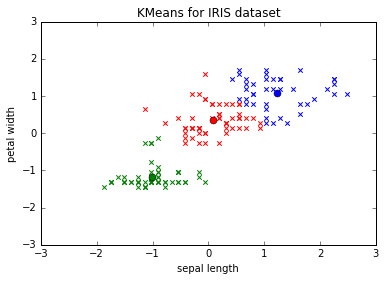

In [122]:
import matplotlib.pyplot as plt
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline


# Assigned Labels after clustering: 
labels = assignments

# Centers of the clusters:
centers = np.swapaxes(centroids,0,1)

# Plotting the results:
plt.figure

for l, c in zip([0,1,2], ['red', 'blue', 'green']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(X.iloc[current_members,0], X.iloc[current_members,1], color = c, marker='x')
    
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-3, 3])
plt.ylim([-3, 3])

# Labels, Title, Legend:
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.title('KMeans for IRIS dataset')

plt.show

In [123]:
centroids.shape

(2, 3)

In [124]:
np.swapaxes(centroids,0,1).shape

(3, 2)